# HR Employee Retention Predictive Model

The task associated with this dataset is to predict whether an employee will leave the company or not using details on employee satisfaction levels, evaluations, time spent at work, department, and salary. Based on this knowledge, company can target those employees and take necessary steps for their retention. In this way the company can reduce employee attrition.
The target variable is left which gives information on whether an employee left the compamny or not. Its a binary classification problem.

Each row represents an employee who either works for the company or has left, as labeled by the column named left. We can therefore train a model to predict this target, given a set of features.

## Preprocessing data for training classification model

In [225]:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [226]:
# Read the data

df = pd.read_csv('D:/Megha/Documents/HR_employee_retention.csv',sep = ',')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [227]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,is_smoker
0,0.38,0.53,2,157,3.0,0,yes,0,sales,low,yes
1,0.80,0.86,5,262,6.0,0,yes,0,sales,medium,yes
2,0.11,0.88,7,272,4.0,0,yes,0,sales,medium,yes


In [228]:
df.tail(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,is_smoker
14996,0.37,0.53,2,143,3.0,0,yes,0,support,low,yes
14997,0.11,0.96,6,280,4.0,0,yes,0,support,low,no
14998,0.37,0.52,2,158,3.0,0,yes,0,support,low,yes


In [229]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'is_smoker'],
      dtype='object')

In [230]:
len(df)

14999

In [231]:
# unique values
df.apply(lambda x: len(x.unique()))

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         9
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
is_smoker                  3
dtype: int64

In [232]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company       float64
Work_accident              int64
left                      object
promotion_last_5years      int64
sales                     object
salary                    object
is_smoker                 object
dtype: object

In [233]:
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company          53
Work_accident                0
left                         0
promotion_last_5years        0
sales                        0
salary                       0
is_smoker                13752
dtype: int64

In [234]:
df.isnull().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.353357
Work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
sales                     0.000000
salary                    0.000000
is_smoker                91.686112
dtype: float64

There are about 0.35% missing values for time_spend_company, and 91.7% missing for is_smoker

In [235]:
# Since there is very few information in the is_smoker field, let's drop this column. Remove column is_smoker
del df['is_smoker']

In [236]:
# check if any duplicate rows
df.duplicated().sum()

2977

In [237]:
df.drop_duplicates(inplace=True)
df.shape

(12022, 10)

## Understanding the individual numerical variables in the dataset.

In [238]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,12022.0,0.629554,0.241214,0.09,0.48,0.66,0.82,1.0
last_evaluation,12022.0,0.716837,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,12022.0,3.803610,1.164076,2.00,3.00,4.00,5.00,7.0
average_montly_hours,12022.0,200.516470,48.739971,96.00,157.00,200.00,243.00,310.0
time_spend_company,11969.0,3.365361,1.330411,2.00,3.00,3.00,4.00,10.0
Work_accident,12022.0,0.154217,0.361172,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,12022.0,0.016886,0.128849,0.00,0.00,0.00,0.00,1.0


In [239]:
cols = ['satisfaction_level','last_evaluation','number_project','time_spend_company','Work_accident','promotion_last_5years', 
        'average_montly_hours']

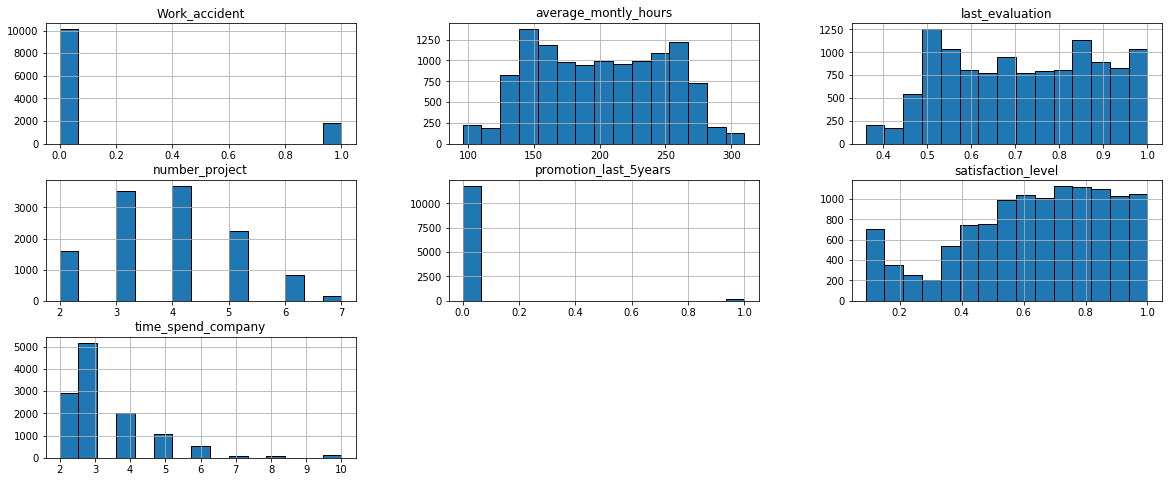

In [240]:
df[cols].hist(edgecolor= 'black', bins = 15, figsize = (20,8),layout = (3,3))
plt.show()

## Understanding the individual categorical variables in the dataset.

In [241]:
#frequency count of left column
df.left.value_counts(dropna=False)

no     10016
yes     2006
Name: left, dtype: int64

In [242]:
#frequency count of sales column
df.sales.value_counts(dropna=False)

sales          3247
technical      2254
support        1828
IT              981
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      437
Name: sales, dtype: int64

In [243]:
df.rename(columns={'sales': 'departments'}, inplace=True)

In [244]:
#frequency count of salary column
df.salary.value_counts(dropna=False)

low       5752
medium    5279
high       991
Name: salary, dtype: int64

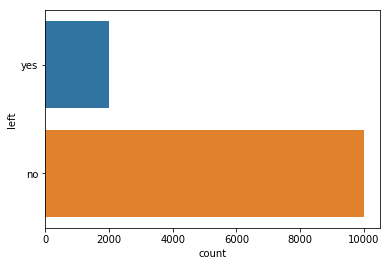

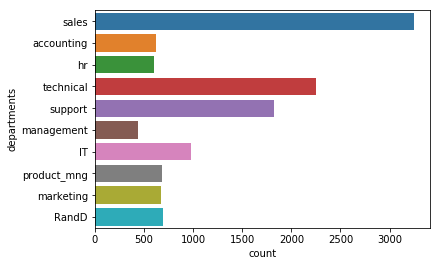

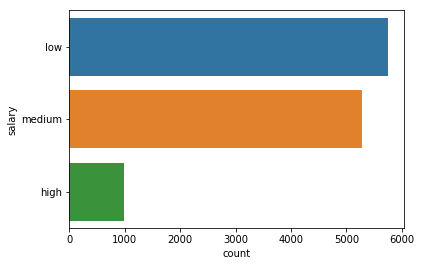

In [245]:
# Plot bar plot for each categorical feature
cat_var = df.select_dtypes(include=['object']).columns.tolist()

for var in cat_var:
    sns.countplot(y = var, data=df)
    plt.show()

## Visualizing the relationship between target variable and numerical variables

The standard plot to visualise the relationship between a categorical and a numerical variable is Boxplot. 

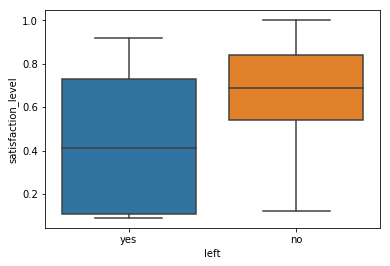

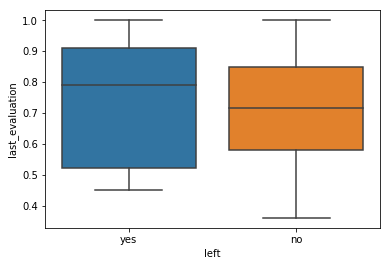

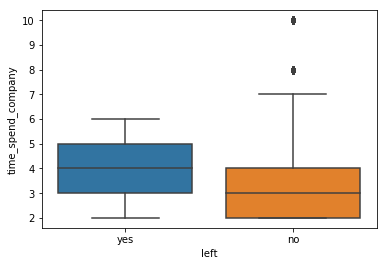

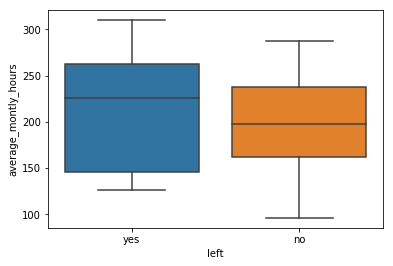

In [246]:
num_var = ['satisfaction_level','last_evaluation','time_spend_company','average_montly_hours']

for var in num_var:
    sns.boxplot(x ='left',y = var, data=df)
    plt.show()

The visualizations reveals interesting informations such as the satisfaction level of employees who left is low compared to those who are still working in the company. Employees who left have work more years with the company comparitively. They spent more average monthly hours working in the company. Regarding the last evaluation rating, it varies a lot but the median is higher than those who didn't left.

## Visualizing the relationship between target variable and categorical variables

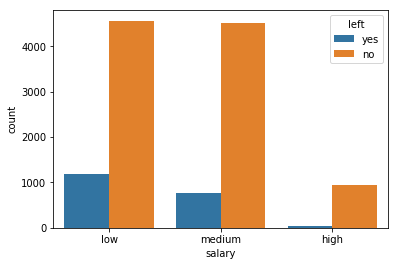

In [247]:
sns.countplot(x='salary',hue='left',data=df)
plt.show()

It shows majority of people who left the company had low salary. And only few employees with high salary left the company.

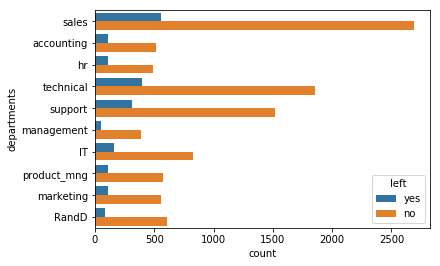

In [248]:
sns.countplot(y='departments',hue='left',data=df)
plt.show()

In [215]:
# Segment by status and display the means within each class
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
no,0.667401,0.715768,3.786442,198.942891,3.262377,0.174521,0.019469
yes,0.440583,0.722173,3.889332,208.373380,3.881467,0.052841,0.003988


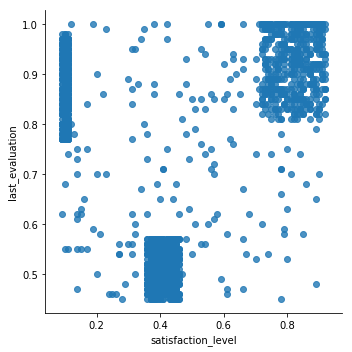

In [216]:
sns.lmplot(y='last_evaluation', x = 'satisfaction_level', data=df[df.left=='yes'], fit_reg=False)
plt.show()


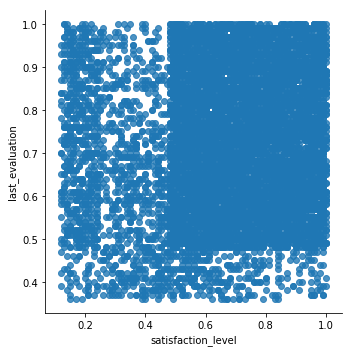

In [217]:
sns.lmplot(y='last_evaluation', x = 'satisfaction_level', data=df[df.left=='no'], fit_reg=False)
plt.show()

#### Filling the Missing Values

Fill null values based on the datatype and the distribution (Histogram).
Since time_spend_company is an integer field and the histogram is right skewed, using the median value to fill 
the NaN values in this column. 
Since 

In [218]:
fill_value = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

In [219]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

#### Transform the string and Boolean fields into integer representations

In [220]:
# convert the target variable left from yes and no to 1 and 0
df.left = df.left.map({'no': 0, 'yes': 1})

In [221]:
# One Hot Coding
df = pd.get_dummies(df)

In [222]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments_IT', 'departments_RandD',
       'departments_accounting', 'departments_hr', 'departments_management',
       'departments_marketing', 'departments_product_mng', 'departments_sales',
       'departments_support', 'departments_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')